In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt


In [ ]:
(Xtrain,ytrain),(Xtest,ytest)=keras.datasets.mnist.load_data()

Xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

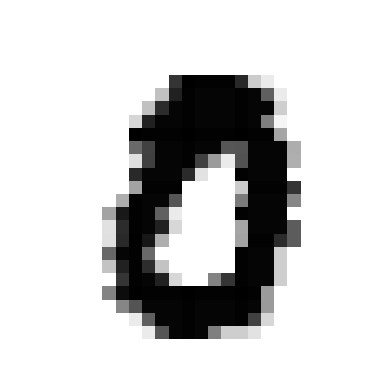

In [ ]:
plt.imshow(Xtrain[69],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
Xtrain = Xtrain/255
Xtest = Xtest/255

# creating ANN
md=Sequential() # create sequential model

# adding 1st layer to flatten the 28x28 array
md.add(Flatten(input_shape=(28,28)))
# adding the 2nd dense layer with 128 nodes and relu actv func
md.add(Dense(128,activation='relu'))
# adding output layer with 10 nodes, using softmax actv func because more than 1 output nodes
md.add(Dense(10,activation='softmax'))
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
md.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',)

In [ ]:
md.fit(Xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.2929 - val_loss: 0.6619
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5510 - val_loss: 0.4331
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4208 - val_loss: 0.3644
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3699 - val_loss: 0.3322
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3424 - val_loss: 0.3113
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3245 - val_loss: 0.2973
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3111 - val_loss: 0.2892
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3006 - val_loss: 0.2797
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2914 - val_loss: 0.2739
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.283

In [ ]:
yprob=md.predict(Xtest)

313/313 [==============================] - 1s 3ms/step


In [ ]:
ypred = yprob.argmax(axis=1)
ypred

array([7, 2, 1, ..., 4, 5, 6])

Accuracy Score: 0.922


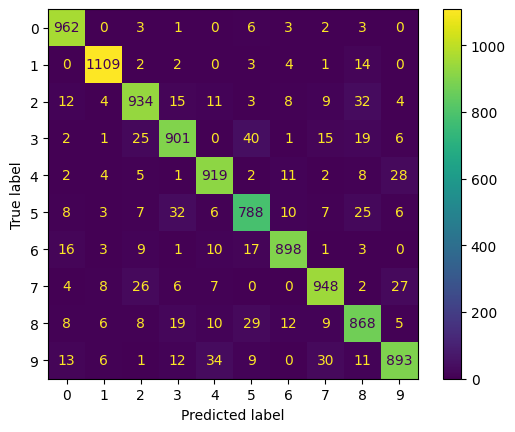

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
acc=accuracy_score(ytest,ypred)
print("Accuracy Score:",acc)
cm=confusion_matrix(ytest,ypred)
cd=ConfusionMatrixDisplay(confusion_matrix=cm)
cd.plot()